In [1]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
font = {'family' : 'times new roman',
        'size'   : 20,
        'weight' : 'bold'}
plt.rc('font', **font)

## Import datsets

In [2]:
scores = pd.read_csv("scores.csv", usecols = [1, 3, 4]) # we only need the data of years upward scores, and downward scores

## Measure the metrics for the entire dynasty

In [10]:
c = Counter([ tuple(row)[2:4] for row in scores.itertuples() ]) ## create the matrix for upward scores and downward scores
ladders = c[(3,4)]+c[(2,4)]+c[(1,4)]+c[(0,4)]+c[(2,3)]+c[(1,3)]+c[(0,3)]+c[(1,2)]+c[(0,2)]+c[(0,1)] # number of ladders
snakes = c[(4,3)]+c[(4,2)]+c[(4,1)]+c[(4,0)]+c[(3,2)]+c[(3,1)]+c[(3,0)]+c[(2,1)]+c[(2,0)]+c[(1,0)] # number of snakes

norm_score_TOT = (ladders-snakes)/len(scores) ## normalized score
first_gen_TOT = (c[(0,4)]+c[(0,3)]+c[(0,2)]+c[(0,1)])/ladders ## proportion of first-generation degree holders
stat_preserve_TOT = (len(scores) - ladders - snakes)/len(scores) ## proportion of status preservers

print("normalized score", norm_score_TOT)
print("first-generation degree holders", first_gen_TOT)
print("status preservers", stat_preserve_TOT)

normalized score -0.3009702329879216
first-generation degree holders 0.5309661436829067
status preservers 0.5391723318592833


## Generate Table 1

In [4]:
import numpy as np

year = 1393
while year <1894:
    mat = np.zeros((5, 5))
    period = scores[(scores['year_of_pass'] >= year) & (scores['year_of_pass'] < year + 18)]
    c = Counter([ tuple(row)[2:4] for row in period.itertuples() ])
    for i, j in c.keys():
        mat[i][j] = c[(i, j)]
    print(year)
    print(mat)
    year += 18


1393
[[166.  13.   9.   4.   0.]
 [ 24.   8.   5.   0.   0.]
 [  4.   1.   3.   0.   1.]
 [  1.   2.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]]
1411
[[209.  16.  10.   3.   1.]
 [ 22.  13.   5.   3.   0.]
 [  8.   3.   2.   1.   2.]
 [  0.   0.   1.   1.   0.]
 [  0.   2.   0.   1.   0.]]
1429
[[150.  17.   5.   4.   0.]
 [ 26.  14.   7.   3.   0.]
 [ 16.   7.   6.   3.   0.]
 [  4.   1.   0.   3.   0.]
 [  1.   1.   0.   0.   0.]]
1447
[[253.  22.  12.   5.   0.]
 [ 73.  21.  16.   5.   0.]
 [ 25.  10.   3.   4.   0.]
 [ 11.   8.   5.   2.   2.]
 [  1.   0.   1.   0.   0.]]
1465
[[251.  16.   9.   6.   1.]
 [ 77.  24.   9.   5.   3.]
 [ 28.  11.   7.   2.   0.]
 [  9.   4.   3.   1.   1.]
 [  0.   0.   2.   0.   0.]]
1483
[[143.  18.   3.   5.   1.]
 [ 79.  20.  10.   3.   0.]
 [ 24.  10.   3.   4.   1.]
 [ 11.   4.   2.   1.   1.]
 [  0.   1.   1.   0.   0.]]
1501
[[179.  38.   8.   4.   2.]
 [ 78.  32.  17.   4.   3.]
 [ 29.  13.  10.   0.   0.]
 [ 11.   5.   4.   2.   1.]
 [  0. 

In [5]:
year = 1393
norm_score = {}
first_gen = {}
passers = {}
stat_preserve = {}
while year <1894: # repeat the procedure for every 18 years
    period = scores[(scores['year_of_pass'] >= year) & (scores['year_of_pass'] < year + 18)]

    c = Counter([ tuple(row)[2:4] for row in period.itertuples() ])
    ladders = c[(3,4)]+c[(2,4)]+c[(1,4)]+c[(0,4)]+c[(2,3)]+c[(1,3)]+c[(0,3)]+c[(1,2)]+c[(0,2)]+c[(0,1)]
    snakes = c[(4,3)]+c[(4,2)]+c[(4,1)]+c[(4,0)]+c[(3,2)]+c[(3,1)]+c[(3,0)]+c[(2,1)]+c[(2,0)]+c[(1,0)]
    
    norm_score[year] = (ladders-snakes)/len(period)
    first_gen[year] = (c[(0,4)]+c[(0,3)]+c[(0,2)]+c[(0,1)])/(ladders)
    passers[year] = len(period)
    stat_preserve[year] = (len(period) - ladders - snakes)/len(period)
    
    year += 18

## Generate Figure 2

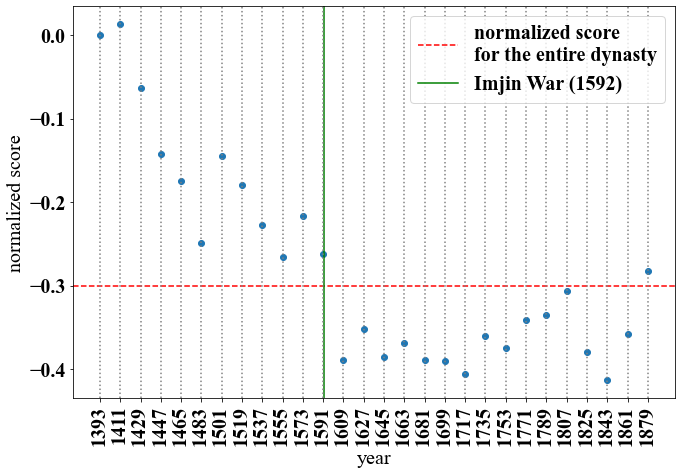

In [6]:
import matplotlib
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10.8, 7.2)

plt.scatter(norm_score.keys(), norm_score.values())
plt.axhline(norm_score_TOT, label = "normalized score\nfor the entire dynasty", c = "red", linestyle = '--')
plt.axvline(1592, label = "Imjin War (1592)", c = "green")

for year in norm_score.keys():
    plt.axvline(year, linestyle='dotted', c ='gray')

plt.ylabel("normalized score")
plt.xlabel("year")
plt.xticks(list(norm_score.keys()), rotation=90)
plt.legend(loc = 'best')
#plt.title("(a)")
plt.show()

## Generate Figure 3

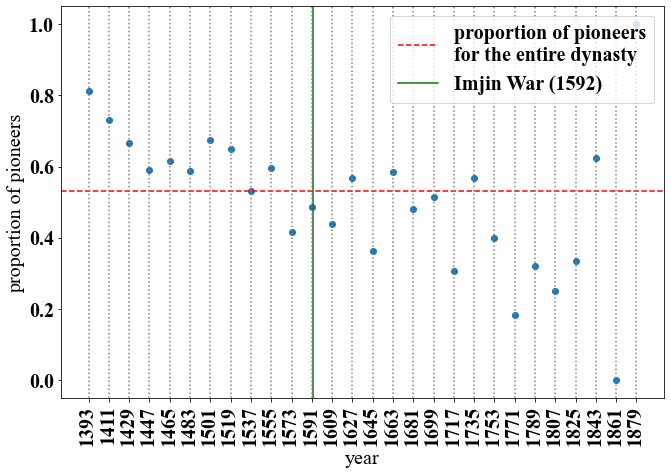

In [7]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10.8, 7.2)

plt.scatter(first_gen.keys(), first_gen.values())
plt.axhline(first_gen_TOT, label = "proportion of pioneers\nfor the entire dynasty", c = "red", linestyle = '--')
plt.axvline(1592, label = "Imjin War (1592)", c = "green")

for year in first_gen.keys():
    plt.axvline(year, linestyle='dotted', c ='gray')

plt.ylabel("proportion of pioneers")
plt.xlabel("year")
plt.xticks(list(first_gen.keys()), rotation=90)
plt.legend(loc = 'best')
plt.show()

## Generate Figure 5

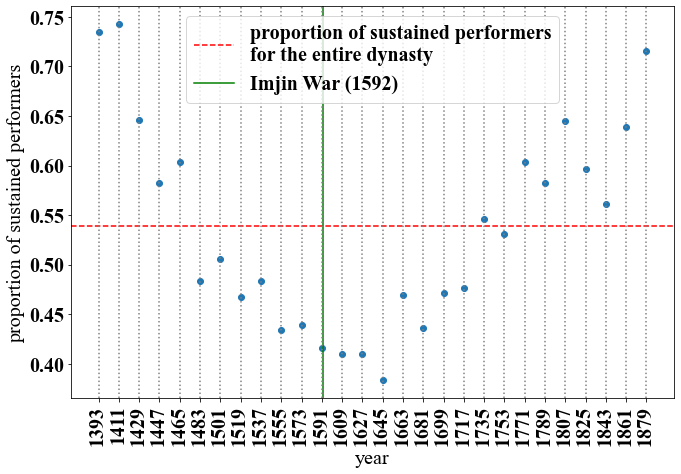

In [8]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10.8, 7.2)

plt.scatter(stat_preserve.keys(), stat_preserve.values())
plt.axhline(stat_preserve_TOT, label = "proportion of sustained performers\nfor the entire dynasty", c = "red", linestyle = '--')
plt.axvline(1592, label = "Imjin War (1592)", c = "green")

for year in first_gen.keys():
    plt.axvline(year, linestyle='dotted', c ='gray')
    
plt.legend(loc = 'best')
plt.xlabel("year")
plt.xticks(list(stat_preserve.keys()), rotation=90)
plt.ylabel("proportion of sustained performers")
plt.show()

## Generate Figure 4

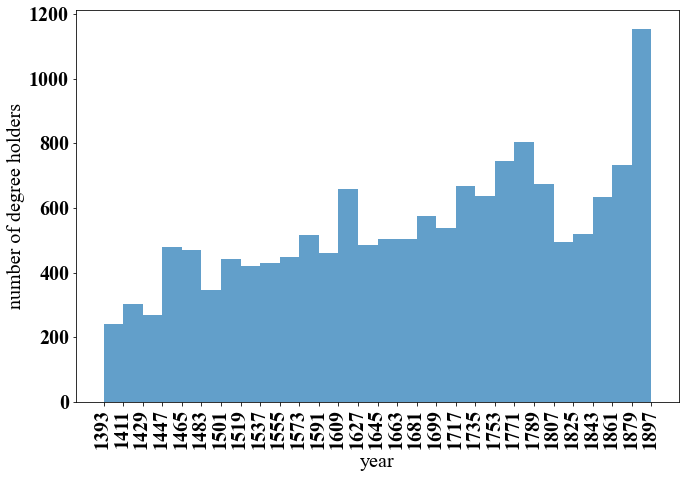

In [9]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10.8, 7.2)

bangmok = pd.read_csv('bangmok.csv')
plt.hist(bangmok['pass_year'], bins=list(first_gen.keys()) + [1897], alpha = 0.7 )
plt.xlabel('year')
plt.xticks(list(first_gen.keys()) + [1897], rotation=90)
plt.ylabel('number of degree holders')
plt.title('')
plt.show()